In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [28]:
import re
def generate_data(file_path):
  valid_rates = []
  with open(file_path, "r") as file:
      for line in file:
          # Use regular expression to find valid_rate in each line
          match = re.search(r"valid_rate:\s(\d+\.\d+)%", line)
          if match:
              # Convert the matched valid_rate to a float and add to the list
              valid_rates.append(float(match.group(1)))
  return valid_rates


In [29]:
import re
def generate_data_quant(file_path):
  valid_rates = []
  with open(file_path, "r") as file:
      for line in file:
          # Use regular expression to find valid_rate in each line
          match = re.search(r"quantVal:\s(\d+\.\d+)", line)
          if match:
              # Convert the matched valid_rate to a float and add to the list
              valid_rates.append(float(match.group(1)))
  return valid_rates


#Balsa X IMDB

##1 - Delta

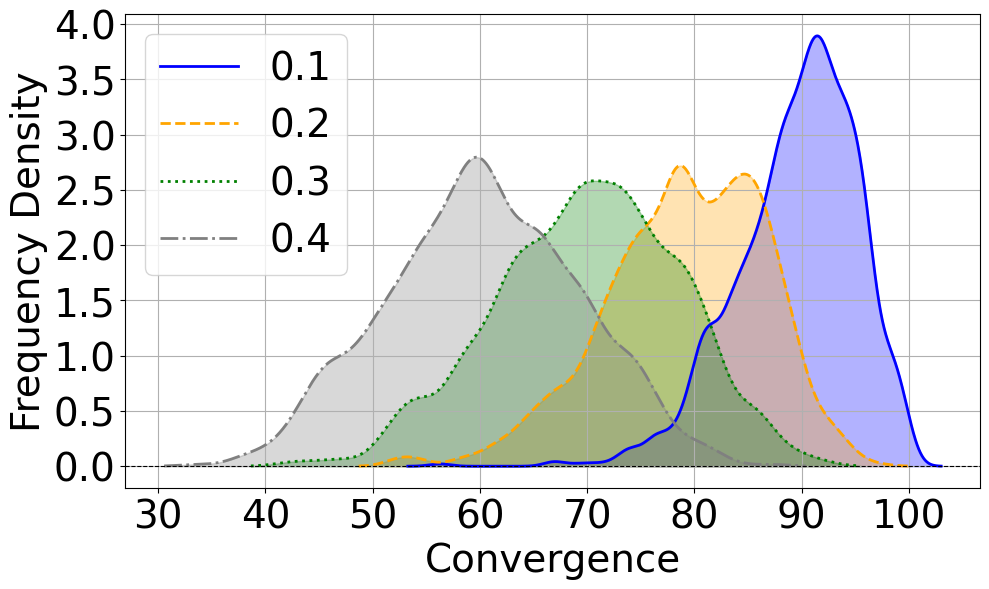

In [36]:
data1Path = "../logs/Balsa x IMDB/1 - Delta/delta0.9"
data2Path = "../logs/Balsa x IMDB/1 - Delta/delta0.8"
data3Path = "../logs/Balsa x IMDB/1 - Delta/delta0.7"
data4Path = "../logs/Balsa x IMDB/1 - Delta/delta0.6"
#0.1
data1 = generate_data(data1Path)
#0.2
data2 = generate_data(data2Path)
#0.3
data3 = generate_data(data3Path)
#0.4
data4 = generate_data(data4Path)

plt.figure(figsize=(10, 6))

# List of datasets
datasets = [data1, data2, data3, data4]
colors = ['blue', 'orange', "green", "grey"]
labels = ['0.1', '0.2', "0.3", "0.4"]
line_styles = ['-', '--', ":", "-."]

bw_adjust=0.7

# Loop through each dataset and plot its KDE
for data, color, label, style in zip(datasets, colors, labels, line_styles):
    # Calculate the KDE
    kde = gaussian_kde(data, bw_method='scott')
    kde.set_bandwidth(bw_method=kde.factor * bw_adjust)
    # Create a range of values for the x-axis
    x = np.linspace(min(data) - 3, max(data) + 3, 1000)

    # Get the density values
    y_density = kde(x)

    # Number of data points
    n = len(data)

    # Scale the y values to frequency
    y_frequency = y_density * n * (x[1] - x[0]) # (x[1] - x[0]) gives the bin width

    # Plot the filled KDE
    plt.fill_between(x, y_frequency, color=color, alpha=0.3)

    # Plot the outline with different line styles
    plt.plot(x, y_frequency, color=color, linewidth=2, linestyle=style, label=label)

# Add labels and title
plt.xlabel('Convergence', fontsize=28)
plt.ylabel('Frequency Density', fontsize=28)

plt.xticks(fontsize=28)
plt.yticks(fontsize=28)

plt.legend(fontsize=28)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0

# Show the plot
plt.tight_layout()
plt.savefig("./LatencyGaurentees/ImpactOfDelta/BalsaXJOB.pdf", format="pdf", bbox_inches="tight")
plt.show()

##2-Iterations

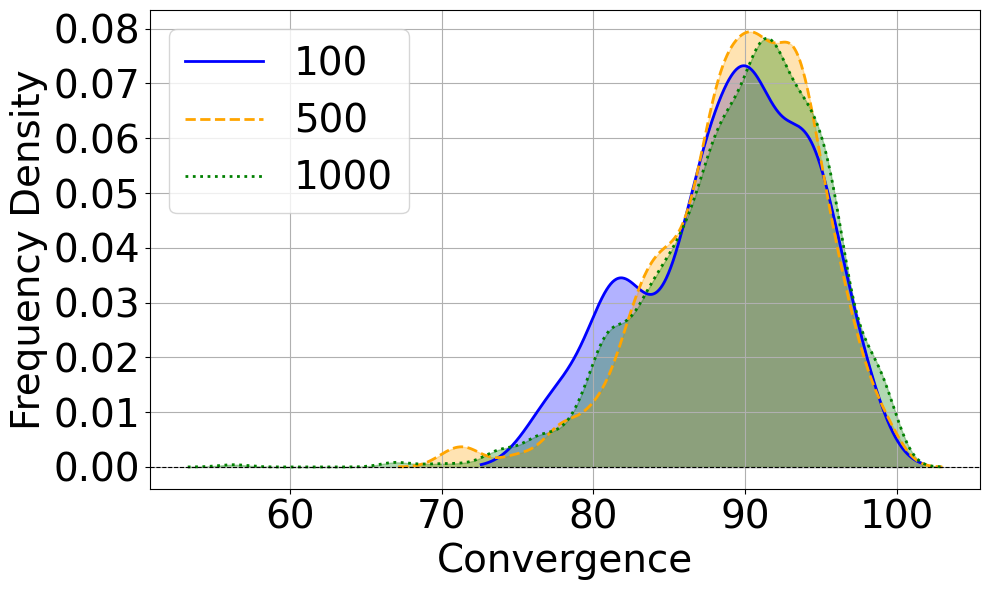

In [44]:
# Ensure necessary imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Assuming generate_data is defined to provide data for each iteration count

data1Path = "../logs/Balsa x IMDB/2 - Iterations/iter100"
data2Path = "../logs/Balsa x IMDB/2 - Iterations/iter500"
data3Path = "../logs/Balsa x IMDB/2 - Iterations/iter1000"

#0.1
data1 = generate_data(data1Path)
#0.2
data2 = generate_data(data2Path)
#0.3
data3 = generate_data(data3Path)

plt.figure(figsize=(10, 6))

# List of datasets
datasets = [data1, data2, data3]
colors = ['blue', 'orange', 'green']
labels = ['100', '500', '1000']
line_styles = ['-', '--', ':']

bw_adjust = 0.7

# Loop through each dataset and plot its KDE
for data, color, label, style in zip(datasets, colors, labels, line_styles):
    # Calculate the KDE
    kde = gaussian_kde(data, bw_method='scott')
    kde.set_bandwidth(bw_method=kde.factor * bw_adjust)
    # Create a range of values for the x-axis
    x = np.linspace(min(data) - 3, max(data) + 3, 1000)

    # Get the density values (normalized)
    y_density = kde(x)

    # Plot the filled KDE (normalized density)
    plt.fill_between(x, y_density, color=color, alpha=0.3)

    # Plot the outline with different line styles
    plt.plot(x, y_density, color=color, linewidth=2, linestyle=style, label=label)

# Add labels and title
plt.xlabel('Convergence', fontsize=28)
plt.ylabel('Frequency Density', fontsize=28)  # Changed to Density for normalized y-axis

plt.xticks(fontsize=28)
plt.yticks(fontsize=28)

plt.legend(fontsize=28)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0

# Show the plot
plt.tight_layout()
plt.savefig("./LatencyGaurentees/ImpactOfSamplingIterations/BalsaXJOB.pdf", format="pdf", bbox_inches="tight")
plt.show()


##3-CalibrationRatio

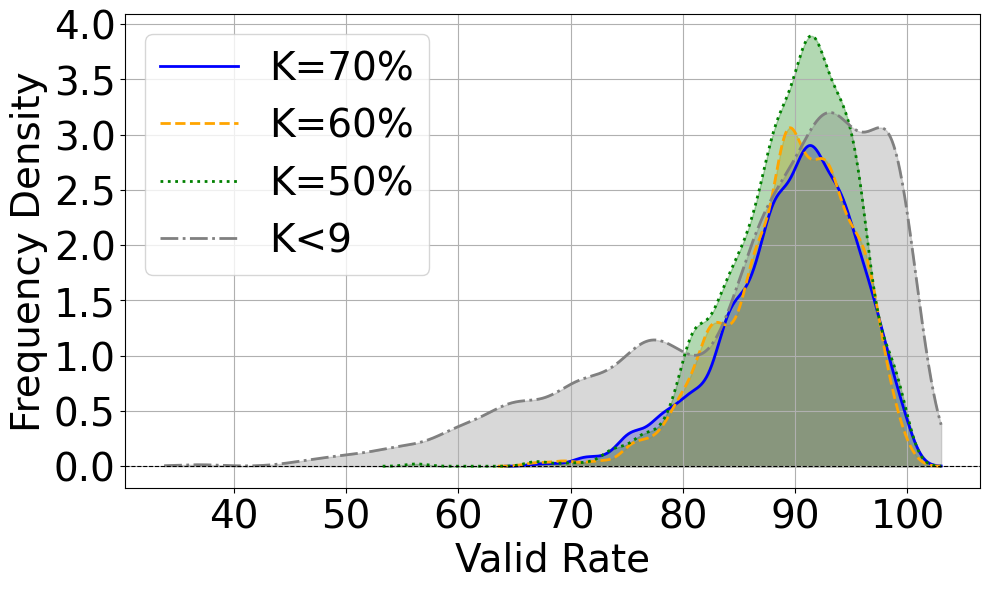

In [46]:
data1Path = "../logs/Balsa x IMDB/3 - Calibration Ratio/70-30%"
data2Path = "../logs/Balsa x IMDB/3 - Calibration Ratio/60-40%"
data3Path = "../logs/Balsa x IMDB/3 - Calibration Ratio/50-50%"
data4Path = "../logs/Balsa x IMDB/3 - Calibration Ratio/ratio-lower-than-valid-k"
#0.1
data1 = generate_data(data1Path)
#0.2
data2 = generate_data(data2Path)
#0.3
data3 = generate_data(data3Path)
#0.4
data4 = generate_data(data4Path)

plt.figure(figsize=(10, 6))

# List of datasets
datasets = [data1, data2, data3, data4]
colors = ['blue', 'orange', "green", "grey"]
labels = ['K=70%', 'K=60%', "K=50%", "K<9"]
line_styles = ['-', '--', ":", "-."]

bw_adjust=0.7

# Loop through each dataset and plot its KDE
for data, color, label, style in zip(datasets, colors, labels, line_styles):
    # Calculate the KDE
    kde = gaussian_kde(data, bw_method='scott')
    kde.set_bandwidth(bw_method=kde.factor * bw_adjust)
    # Create a range of values for the x-axis
    x = np.linspace(min(data) - 3, max(data) + 3, 1000)

    # Get the density values
    y_density = kde(x)

    # Number of data points
    n = len(data)

    # Scale the y values to frequency
    y_frequency = y_density * n * (x[1] - x[0])  # (x[1] - x[0]) gives the bin width

    # Plot the filled KDE
    plt.fill_between(x, y_frequency, color=color, alpha=0.3)

    # Plot the outline with different line styles
    plt.plot(x, y_frequency, color=color, linewidth=2, linestyle=style, label=label)

# Add labels and title
plt.xlabel('Valid Rate', fontsize=28)
plt.ylabel('Frequency Density', fontsize=28)

plt.xticks(fontsize=28)
plt.yticks(fontsize=28)

plt.legend(fontsize=28)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0

# Show the plot
plt.tight_layout()
plt.savefig("./LatencyGaurentees/ChangeOfCalibrationSize/BalsaXJOB.pdf", format="pdf", bbox_inches="tight")
plt.show()

##5-WholePlan

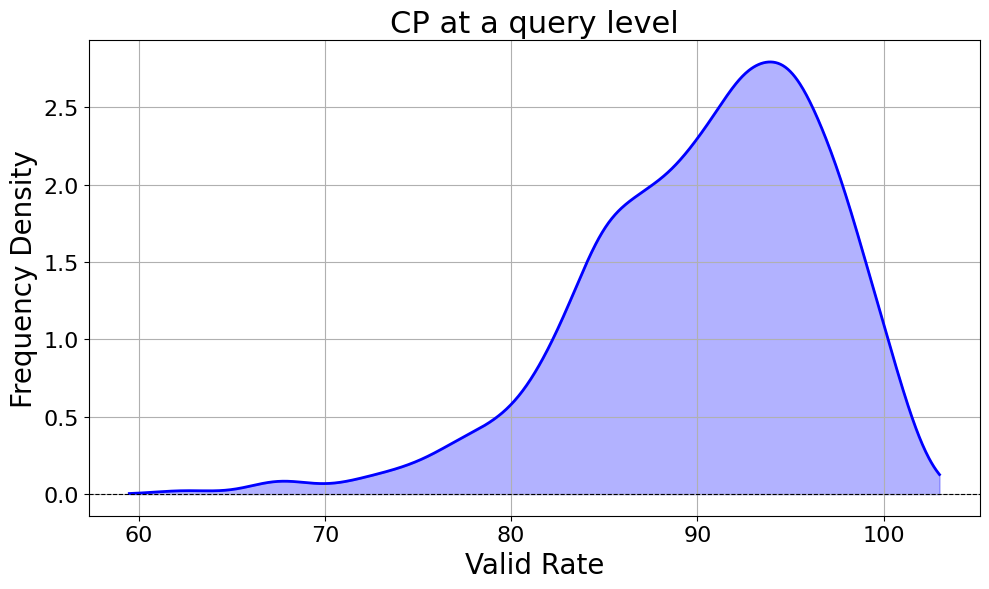

In [ ]:
data1 = generate_data("delta0.9")

plt.figure(figsize=(10, 6))

# List of datasets
datasets = [data1]
colors = ['blue']
#labels = ['No norm']
line_styles = ['-']  # Solid, Dashed, Dotted

bw_adjust=1

# Loop through each dataset and plot its KDE
for data, color, label, style in zip(datasets, colors, labels, line_styles):
    # Calculate the KDE
    kde = gaussian_kde(data, bw_method='scott')
    kde.set_bandwidth(bw_method=kde.factor * bw_adjust)
    # Create a range of values for the x-axis
    x = np.linspace(min(data) - 3, max(data) + 3, 1000)

    # Get the density values
    y_density = kde(x)

    # Number of data points
    n = len(data)

    # Scale the y values to frequency
    y_frequency = y_density * n * (x[1] - x[0])  # (x[1] - x[0]) gives the bin width

    # Plot the filled KDE
    plt.fill_between(x, y_frequency, color=color, alpha=0.3)

    # Plot the outline with different line styles
    plt.plot(x, y_frequency, color=color, linewidth=2, linestyle=style, label=label)

# Add labels and title
plt.xlabel('Valid Rate', fontsize=20)
plt.ylabel('Frequency Density', fontsize=20)
plt.title("CP at a query level", fontsize=22)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#plt.legend(fontsize=20)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0

# Show the plot
plt.tight_layout()
plt.show()

##4-Substructure

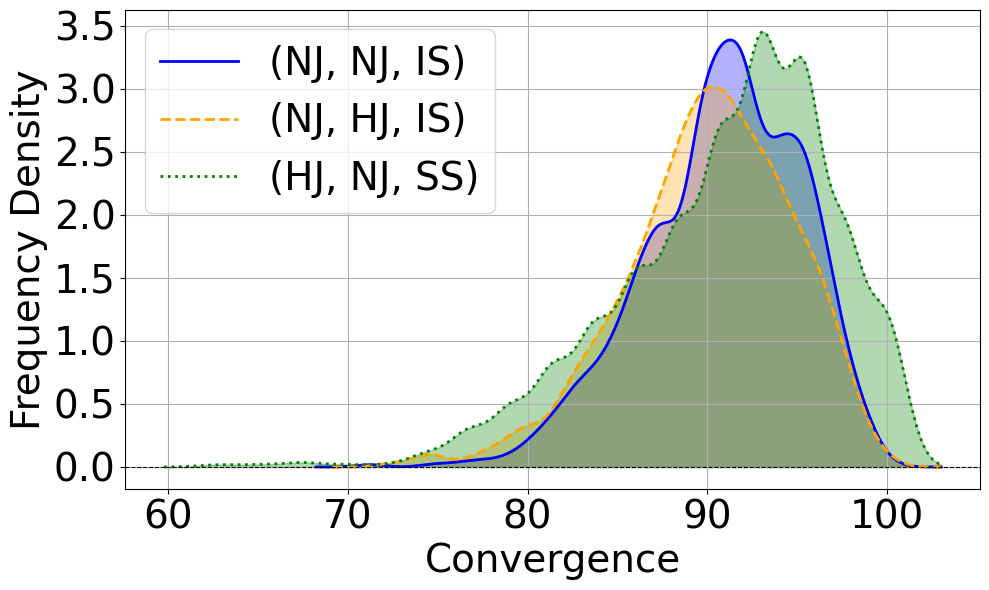

In [47]:
data1Path = "../logs/Balsa x IMDB/4 - Substructure/Top1"
data2Path = "../logs/Balsa x IMDB/4 - Substructure/Top2"
data3Path = "../logs/Balsa x IMDB/4 - Substructure/Top3"
#0.1
data1 = generate_data(data1Path)
#0.2
data2 = generate_data(data2Path)
#0.3
data3 = generate_data(data3Path)

# Create a figure and axis
plt.figure(figsize=(10, 6))

# List of datasets
datasets = [data1, data2, data3]
colors = ['blue', 'orange', 'green']
labels = ['(NJ, NJ, IS)', '(NJ, HJ, IS)', '(HJ, NJ, SS)']
line_styles = ['-', '--', ':']  # Solid, Dashed, Dotted

bw_adjust=0.7

# Loop through each dataset and plot its KDE
for data, color, label, style in zip(datasets, colors, labels, line_styles):
    # Calculate the KDE
    kde = gaussian_kde(data, bw_method='scott')
    kde.set_bandwidth(bw_method=kde.factor * bw_adjust)
    # Create a range of values for the x-axis
    x = np.linspace(min(data) - 3, max(data) + 3, 1000)

    # Get the density values
    y_density = kde(x)

    # Number of data points
    n = len(data)

    # Scale the y values to frequency
    y_frequency = y_density * n * (x[1] - x[0])  # (x[1] - x[0]) gives the bin width

    # Plot the filled KDE
    plt.fill_between(x, y_frequency, color=color, alpha=0.3)

    # Plot the outline with different line styles
    plt.plot(x, y_frequency, color=color, linewidth=2, linestyle=style, label=label)

# Add labels and title
plt.xlabel('Convergence', fontsize=28)
plt.ylabel('Frequency Density', fontsize=28)

plt.xticks(fontsize=28)
plt.yticks(fontsize=28)

plt.legend(fontsize=28)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0

# Show the plot
plt.tight_layout()
plt.savefig("./RuntimeVerification/Patterns/Top3.pdf", format="pdf", bbox_inches="tight")
plt.show()

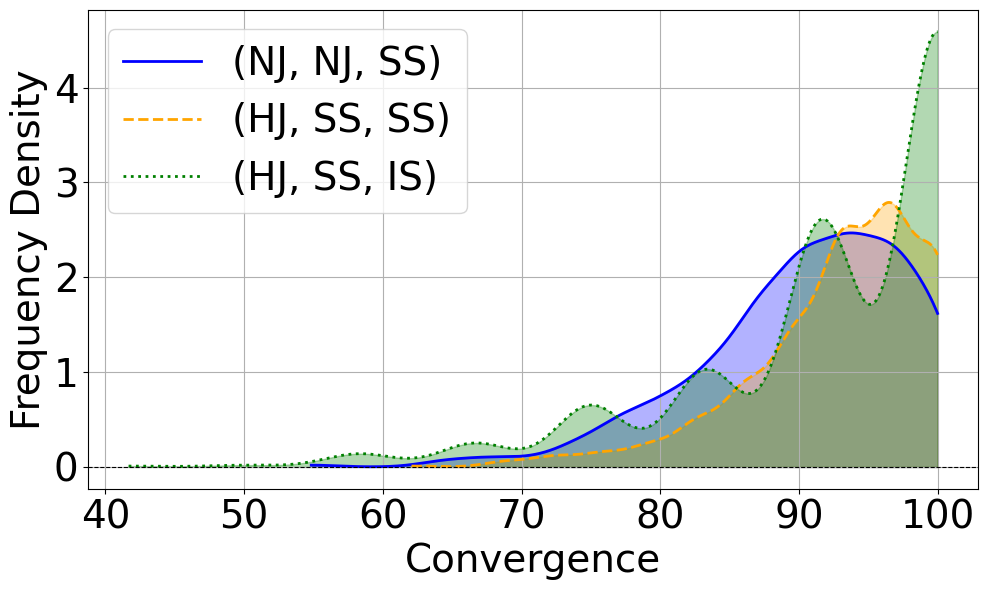

In [50]:
data1Path = "../logs/Balsa x IMDB/4 - Substructure/Top4"
data2Path = "../logs/Balsa x IMDB/4 - Substructure/Top5"
data3Path = "../logs/Balsa x IMDB/4 - Substructure/Top6"
#0.1
data1 = generate_data(data1Path)
#0.2
data2 = generate_data(data2Path)
#0.3
data3 = generate_data(data3Path)

# Create a figure and axis
plt.figure(figsize=(10, 6))

# List of datasets
datasets = [data1, data2, data3]
colors = ['blue', 'orange', 'green']
labels = ['(NJ, NJ, SS)', '(HJ, SS, SS)', '(HJ, SS, IS)']
line_styles = ['-', '--', ':']  # Solid, Dashed, Dotted

bw_adjust=1

# Loop through each dataset and plot its KDE
for data, color, label, style in zip(datasets, colors, labels, line_styles):
    # Calculate the KDE
    kde = gaussian_kde(data, bw_method='scott')
    kde.set_bandwidth(bw_method=kde.factor * bw_adjust)
    # Create a range of values for the x-axis
    x = np.linspace(min(data), max(data), 1000)

    # Get the density values
    y_density = kde(x)

    # Number of data points
    n = len(data)

    # Scale the y values to frequency
    y_frequency = y_density * n * (x[1] - x[0])  # (x[1] - x[0]) gives the bin width

    # Plot the filled KDE
    plt.fill_between(x, y_frequency, color=color, alpha=0.3)

    # Plot the outline with different line styles
    plt.plot(x, y_frequency, color=color, linewidth=2, linestyle=style, label=label)

# Add labels and title
plt.xlabel('Convergence', fontsize=28)
plt.ylabel('Frequency Density', fontsize=28)

plt.xticks(fontsize=28)
plt.yticks(fontsize=28)

plt.legend(fontsize=28)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0

# Show the plot
plt.tight_layout()
plt.savefig("./RuntimeVerification/Patterns/Least3.pdf", format="pdf", bbox_inches="tight")
plt.show()

#Balsa X TPCH

##1-Delta

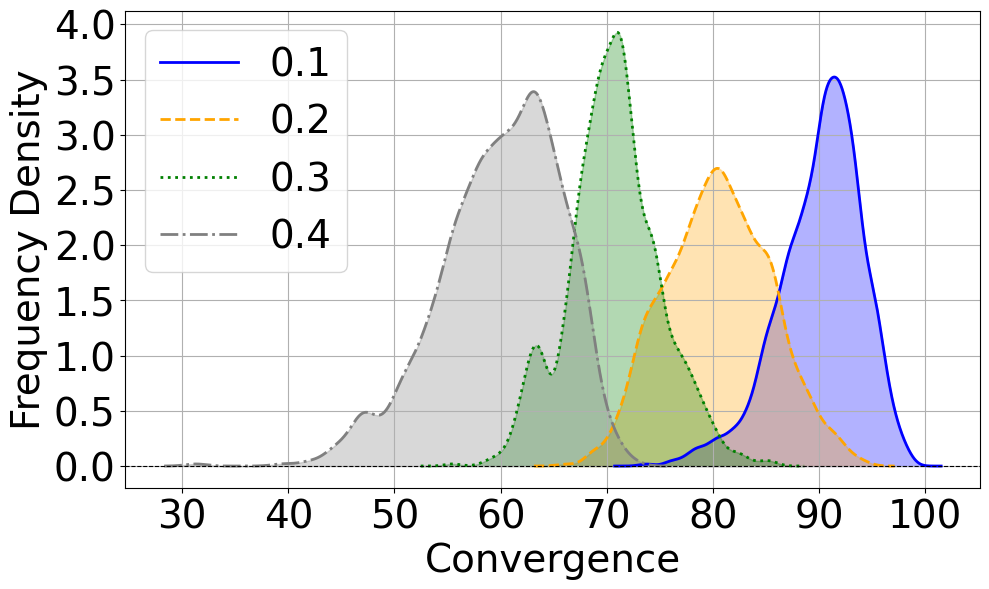

In [51]:
data1Path = "../logs/Balsa x TPCH/1 - Delta/delta0.9"
data2Path = "../logs/Balsa x TPCH/1 - Delta/delta0.8"
data3Path = "../logs/Balsa x TPCH/1 - Delta/delta0.7"
data4Path = "../logs/Balsa x TPCH/1 - Delta/delta0.6"
#0.1
data1 = generate_data(data1Path)
#0.2
data2 = generate_data(data2Path)
#0.3
data3 = generate_data(data3Path)
#0.4
data4 = generate_data(data4Path)

plt.figure(figsize=(10, 6))

# List of datasets
datasets = [data1, data2, data3, data4]
colors = ['blue', 'orange', "green", "grey"]
labels = ['0.1', '0.2', "0.3", "0.4"]
line_styles = ['-', '--', ":", "-."]

bw_adjust=0.7

# Loop through each dataset and plot its KDE
for data, color, label, style in zip(datasets, colors, labels, line_styles):
    # Calculate the KDE
    kde = gaussian_kde(data, bw_method='scott')
    kde.set_bandwidth(bw_method=kde.factor * bw_adjust)
    # Create a range of values for the x-axis
    x = np.linspace(min(data) - 3, max(data) + 3, 1000)

    # Get the density values
    y_density = kde(x)

    # Number of data points
    n = len(data)

    # Scale the y values to frequency
    y_frequency = y_density * n * (x[1] - x[0])  # (x[1] - x[0]) gives the bin width

    # Plot the filled KDE
    plt.fill_between(x, y_frequency, color=color, alpha=0.3)

    # Plot the outline with different line styles
    plt.plot(x, y_frequency, color=color, linewidth=2, linestyle=style, label=label)

# Add labels and title
plt.xlabel('Convergence', fontsize=28)
plt.ylabel('Frequency Density', fontsize=28)

plt.xticks(fontsize=28)
plt.yticks(fontsize=28)

plt.legend(fontsize=28)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0

# Show the plot
plt.tight_layout()
plt.savefig("./LatencyGaurentees/ImpactOfDelta/BalsaXTPCH.pdf", format="pdf", bbox_inches="tight")
plt.show()

##2-Iteration

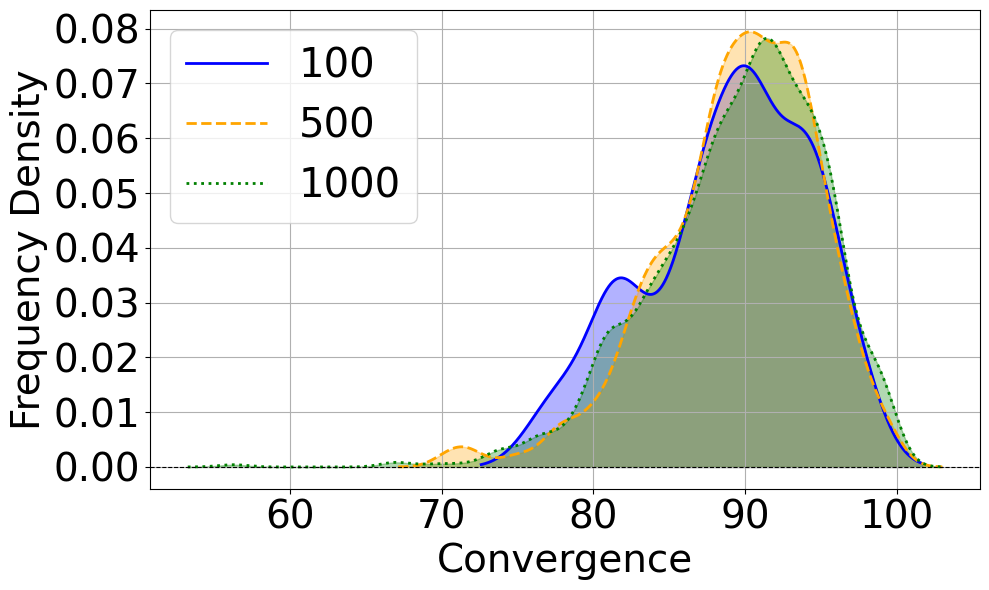

In [45]:
data1Path = "../logs/Balsa x IMDB/2 - Iterations/iter100"
data2Path = "../logs/Balsa x IMDB/2 - Iterations/iter500"
data3Path = "../logs/Balsa x IMDB/2 - Iterations/iter1000"

#0.1
data1 = generate_data(data1Path)
#0.2
data2 = generate_data(data2Path)
#0.3
data3 = generate_data(data3Path)

plt.figure(figsize=(10, 6))

# List of datasets
datasets = [data1, data2, data3]
colors = ['blue', 'orange', "green"]
labels = ['100', '500', "1000"]
line_styles = ['-', '--', ":", "-."]

bw_adjust=0.7

# Loop through each dataset and plot its KDE
for data, color, label, style in zip(datasets, colors, labels, line_styles):
    # Calculate the KDE
    kde = gaussian_kde(data, bw_method='scott')
    kde.set_bandwidth(bw_method=kde.factor * bw_adjust)
    # Create a range of values for the x-axis
    x = np.linspace(min(data) - 3, max(data) + 3, 1000)

    # Get the density values
    y_density = kde(x)

    # Number of data points
    n = len(data)

    # Scale the y values to frequency
    y_frequency = y_density * n * (x[1] - x[0])  # (x[1] - x[0]) gives the bin width

    # Plot the filled KDE
    plt.fill_between(x, y_density, color=color, alpha=0.3)

    # Plot the outline with different line styles
    plt.plot(x, y_density, color=color, linewidth=2, linestyle=style, label=label)

# Add labels and title
plt.xlabel('Convergence', fontsize=28)
plt.ylabel('Frequency Density', fontsize=28)

plt.xticks(fontsize=28)
plt.yticks(fontsize=28)

plt.legend(fontsize=29)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0

# Show the plot
plt.tight_layout()
plt.savefig("./LatencyGaurentees/ImpactOfSamplingIterations/BalsaXTPCH.pdf", format="pdf", bbox_inches="tight")
plt.show()

##3-CalibrationSize


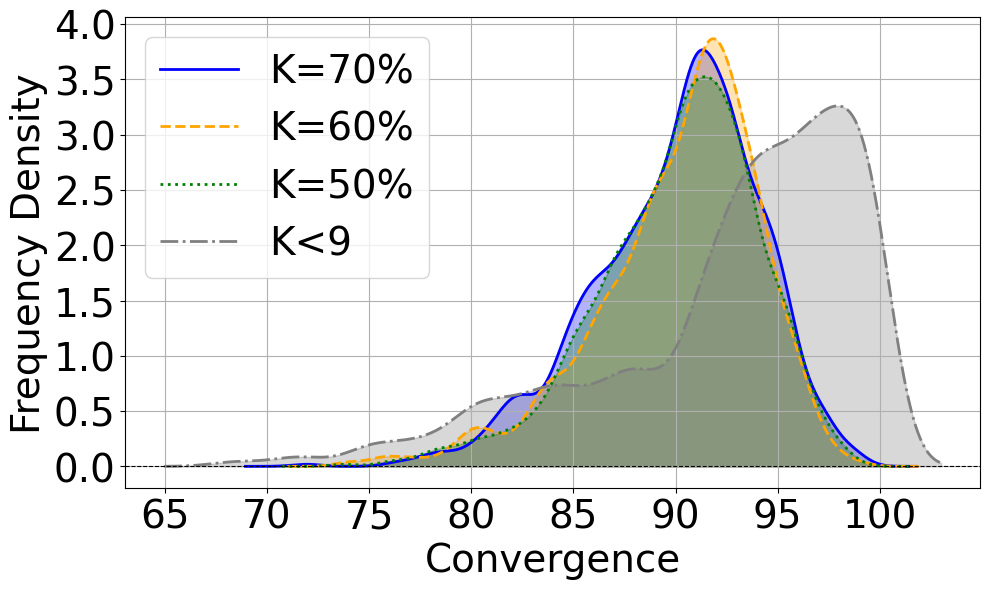

In [53]:
data1Path = "../logs/Balsa x TPCH/3 - Calibration Ratio/70-30%"
data2Path = "../logs/Balsa x TPCH/3 - Calibration Ratio/60-40%"
data3Path = "../logs/Balsa x TPCH/3 - Calibration Ratio/50-50%"
data4Path = "../logs/Balsa x TPCH/3 - Calibration Ratio/ratio-lower-than-valid-k"

data1 = generate_data(data1Path)
data2 = generate_data(data2Path)
data3 = generate_data(data3Path)
data4 = generate_data(data4Path)


plt.figure(figsize=(10, 6))

# List of datasets
datasets = [data1, data2, data3, data4]
colors = ['blue', 'orange', "green", "grey"]
labels = ['K=70%', 'K=60%', "K=50%", "K<9"]
line_styles = ['-', '--', ":", "-."]

bw_adjust=0.7

# Loop through each dataset and plot its KDE
for data, color, label, style in zip(datasets, colors, labels, line_styles):
    # Calculate the KDE
    kde = gaussian_kde(data, bw_method='scott')
    kde.set_bandwidth(bw_method=kde.factor * bw_adjust)
    # Create a range of values for the x-axis
    x = np.linspace(min(data) - 3, max(data) + 3, 1000)

    # Get the density values
    y_density = kde(x)

    # Number of data points
    n = len(data)

    # Scale the y values to frequency
    y_frequency = y_density * n * (x[1] - x[0])  # (x[1] - x[0]) gives the bin width

    # Plot the filled KDE
    plt.fill_between(x, y_frequency, color=color, alpha=0.3)

    # Plot the outline with different line styles
    plt.plot(x, y_frequency, color=color, linewidth=2, linestyle=style, label=label)

# Add labels and title
plt.xlabel('Convergence', fontsize=28)
plt.ylabel('Frequency Density', fontsize=28)

plt.xticks(fontsize=28)
plt.yticks(fontsize=28)

plt.legend(fontsize=28)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0

# Show the plot
plt.tight_layout()
plt.savefig("./LatencyGaurentees/ChangeOfCalibrationSize/BalsaXTPCH.pdf", format="pdf", bbox_inches="tight")
plt.show()

#LERO X IMDB

##1-Delta

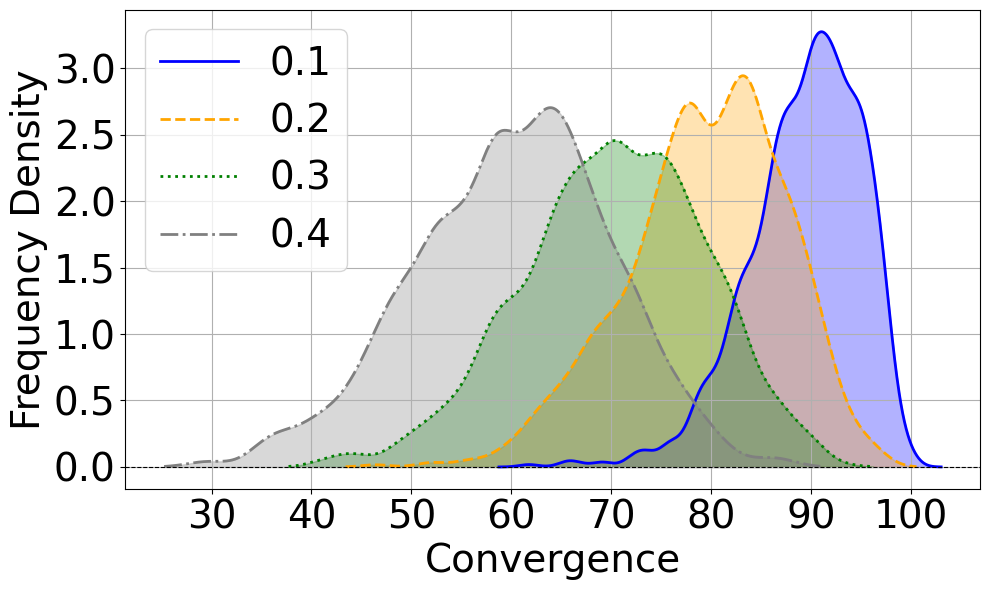

In [54]:
data1Path = "../logs/Lero/IMDB/1 - Delta (Unified CP)/delta0.9"
data2Path = "../logs/Lero/IMDB/1 - Delta (Unified CP)/delta0.8"
data3Path = "../logs/Lero/IMDB/1 - Delta (Unified CP)/delta0.7"
data4Path = "../logs/Lero/IMDB/1 - Delta (Unified CP)/delta0.6"

#0.1
data1 = generate_data(data1Path)
#0.2
data2 = generate_data(data2Path)
#0.3
data3 = generate_data(data3Path)
#0.4
data4 = generate_data(data4Path)

plt.figure(figsize=(10, 6))

# List of datasets
datasets = [data1, data2, data3, data4]
colors = ['blue', 'orange', "green", "grey"]
labels = ['0.1', '0.2', "0.3", "0.4"]
line_styles = ['-', '--', ":", "-."]

bw_adjust=0.7

# Loop through each dataset and plot its KDE
for data, color, label, style in zip(datasets, colors, labels, line_styles):
    # Calculate the KDE
    kde = gaussian_kde(data, bw_method='scott')
    kde.set_bandwidth(bw_method=kde.factor * bw_adjust)
    # Create a range of values for the x-axis
    x = np.linspace(min(data) - 3, max(data) + 3, 1000)

    # Get the density values
    y_density = kde(x)

    # Number of data points
    n = len(data)

    # Scale the y values to frequency
    y_frequency = y_density * n * (x[1] - x[0])  # (x[1] - x[0]) gives the bin width

    # Plot the filled KDE
    plt.fill_between(x, y_frequency, color=color, alpha=0.3)

    # Plot the outline with different line styles
    plt.plot(x, y_frequency, color=color, linewidth=2, linestyle=style, label=label)

# Add labels and title
plt.xlabel('Convergence', fontsize=28)
plt.ylabel('Frequency Density', fontsize=28)

plt.xticks(fontsize=28)
plt.yticks(fontsize=28)

plt.legend(fontsize=28)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0

# Show the plot
plt.tight_layout()
plt.savefig("./LatencyGaurentees/ImpactOfDelta/LeroXJOB.pdf", format="pdf", bbox_inches="tight")
plt.show()

##2-CalibrationSize

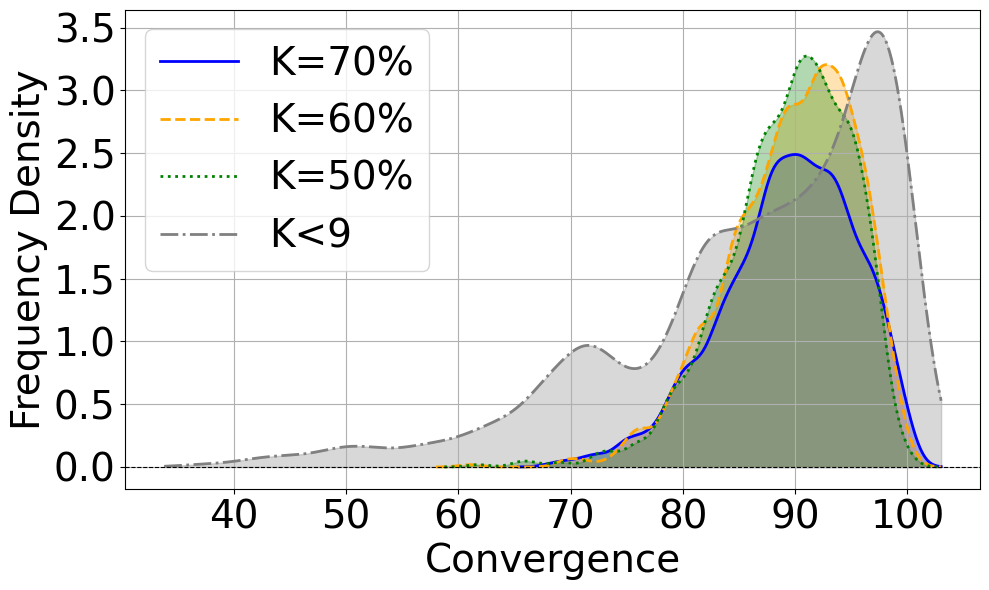

In [56]:
data1Path = "../logs/Lero/IMDB/3 - Calibration Ratio (Unified CP)/70-30%"
data2Path = "../logs/Lero/IMDB/3 - Calibration Ratio (Unified CP)/60-40%"
data3Path = "../logs/Lero/IMDB/3 - Calibration Ratio (Unified CP)/50-50%"
data4Path = "../logs/Lero/IMDB/3 - Calibration Ratio (Unified CP)/ratio-lower-than-valid-k"

#0.1
data1 = generate_data(data1Path)
#0.2
data2 = generate_data(data2Path)
#0.3
data3 = generate_data(data3Path)
#0.4
data4 = generate_data(data4Path)

plt.figure(figsize=(10, 6))

# List of datasets
datasets = [data1, data2, data3, data4]
colors = ['blue', 'orange', "green", "grey"]
labels = ['K=70%', 'K=60%', "K=50%", "K<9"]
line_styles = ['-', '--', ":", "-."]

bw_adjust=0.7

# Loop through each dataset and plot its KDE
for data, color, label, style in zip(datasets, colors, labels, line_styles):
    # Calculate the KDE
    kde = gaussian_kde(data, bw_method='scott')
    kde.set_bandwidth(bw_method=kde.factor * bw_adjust)
    # Create a range of values for the x-axis
    x = np.linspace(min(data) - 3, max(data) + 3, 1000)

    # Get the density values
    y_density = kde(x)

    # Number of data points
    n = len(data)

    # Scale the y values to frequency
    y_frequency = y_density * n * (x[1] - x[0])  # (x[1] - x[0]) gives the bin width

    # Plot the filled KDE
    plt.fill_between(x, y_frequency, color=color, alpha=0.3)

    # Plot the outline with different line styles
    plt.plot(x, y_frequency, color=color, linewidth=2, linestyle=style, label=label)

# Add labels and title
plt.xlabel('Convergence', fontsize=28)
plt.ylabel('Frequency Density', fontsize=28)

plt.xticks(fontsize=28)
plt.yticks(fontsize=28)

plt.legend(fontsize=28)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0

# Show the plot
plt.tight_layout()
plt.savefig("./LatencyGaurentees/ChangeOfCalibrationSize/LeroXJOB.pdf", format="pdf", bbox_inches="tight")
plt.show()

##3-WholePlan [NOT USED]

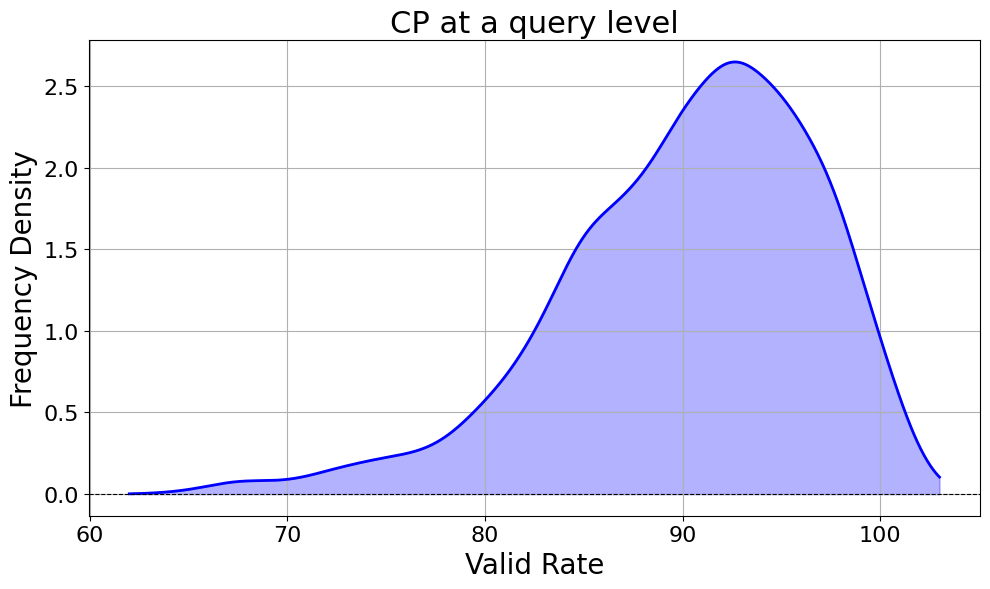

In [ ]:
data1 = generate_data("delta0.9")

plt.figure(figsize=(10, 6))

# List of datasets
datasets = [data1]
colors = ['blue']
#labels = ['No norm']
line_styles = ['-']  # Solid, Dashed, Dotted

bw_adjust=1

# Loop through each dataset and plot its KDE
for data, color, label, style in zip(datasets, colors, labels, line_styles):
    # Calculate the KDE
    kde = gaussian_kde(data, bw_method='scott')
    kde.set_bandwidth(bw_method=kde.factor * bw_adjust)
    # Create a range of values for the x-axis
    x = np.linspace(min(data) - 3, max(data) + 3, 1000)

    # Get the density values
    y_density = kde(x)

    # Number of data points
    n = len(data)

    # Scale the y values to frequency
    y_frequency = y_density * n * (x[1] - x[0])  # (x[1] - x[0]) gives the bin width

    # Plot the filled KDE
    plt.fill_between(x, y_frequency, color=color, alpha=0.3)

    # Plot the outline with different line styles
    plt.plot(x, y_frequency, color=color, linewidth=2, linestyle=style, label=label)

# Add labels and title
plt.xlabel('Valid Rate', fontsize=20)
plt.ylabel('Frequency Density', fontsize=20)
plt.title("CP at a query level", fontsize=22)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#plt.legend(fontsize=20)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0

# Show the plot
plt.tight_layout()
plt.show()

#LERO X TPCH

#1-Delta

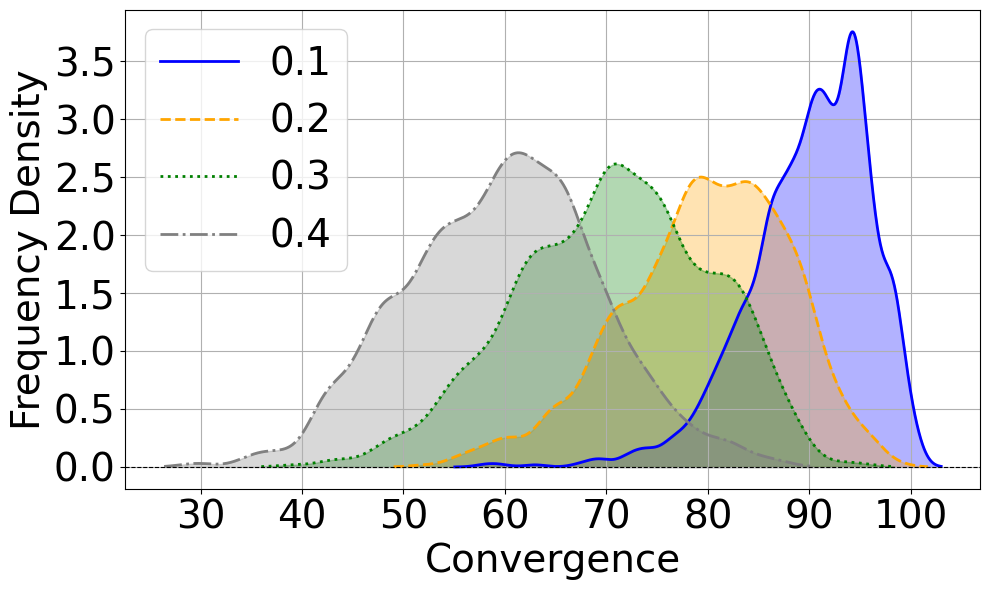

In [57]:
data1Path = "../logs/Lero/TPCH/1 - Delta (Unified CP)/delta0.9"
data2Path = "../logs/Lero/TPCH/1 - Delta (Unified CP)/delta0.8"
data3Path = "../logs/Lero/TPCH/1 - Delta (Unified CP)/delta0.7"
data4Path = "../logs/Lero/TPCH/1 - Delta (Unified CP)/delta0.6"

#0.1
data1 = generate_data(data1Path)
#0.2
data2 = generate_data(data2Path)
#0.3
data3 = generate_data(data3Path)
#0.4
data4 = generate_data(data4Path)


plt.figure(figsize=(10, 6))

# List of datasets
datasets = [data1, data2, data3, data4]
colors = ['blue', 'orange', "green", "grey"]
labels = ['0.1', '0.2', "0.3", "0.4"]
line_styles = ['-', '--', ":", "-."]

bw_adjust=0.7

# Loop through each dataset and plot its KDE
for data, color, label, style in zip(datasets, colors, labels, line_styles):
    # Calculate the KDE
    kde = gaussian_kde(data, bw_method='scott')
    kde.set_bandwidth(bw_method=kde.factor * bw_adjust)
    # Create a range of values for the x-axis
    x = np.linspace(min(data) - 3, max(data) + 3, 1000)

    # Get the density values
    y_density = kde(x)

    # Number of data points
    n = len(data)

    # Scale the y values to frequency
    y_frequency = y_density * n * (x[1] - x[0])  # (x[1] - x[0]) gives the bin width

    # Plot the filled KDE
    plt.fill_between(x, y_frequency, color=color, alpha=0.3)

    # Plot the outline with different line styles
    plt.plot(x, y_frequency, color=color, linewidth=2, linestyle=style, label=label)

# Add labels and title
plt.xlabel('Convergence', fontsize=28)
plt.ylabel('Frequency Density', fontsize=28)

plt.xticks(fontsize=28)
plt.yticks(fontsize=28)

plt.legend(fontsize=28)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0

# Show the plot
plt.tight_layout()
plt.savefig("./LatencyGaurentees/ImpactOfDelta/LeroXTPCH.pdf", format="pdf", bbox_inches="tight")
plt.show()

##2-CalibrationSize

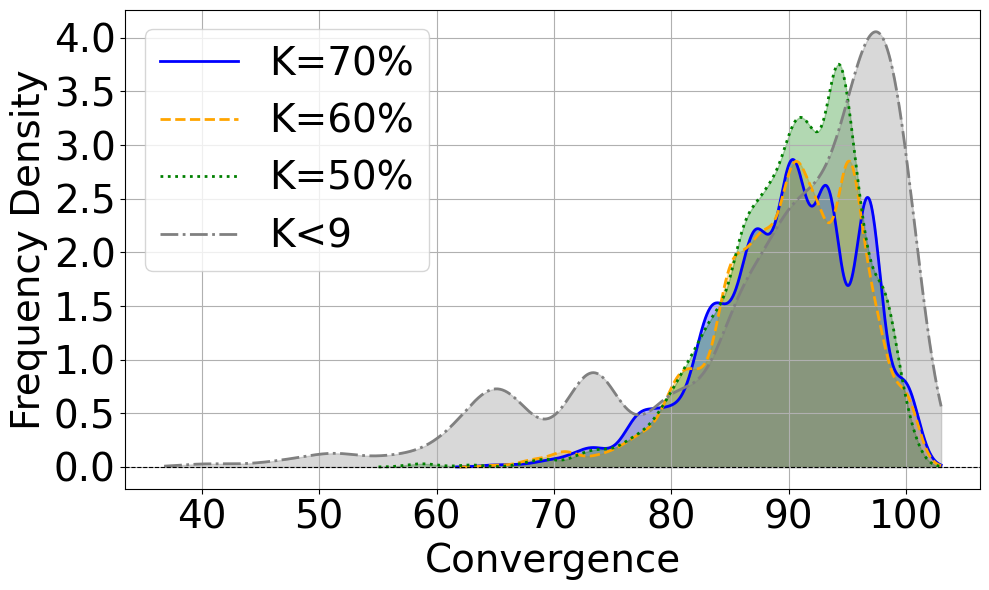

In [63]:
data1Path = "../logs/Lero/TPCH/3 - Calibration Ratio (Unified CP)/70-30%"
data2Path = "../logs/Lero/TPCH/3 - Calibration Ratio (Unified CP)/60-40%"
data3Path = "../logs/Lero/TPCH/3 - Calibration Ratio (Unified CP)/50-50%"
data4Path = "../logs/Lero/TPCH/3 - Calibration Ratio (Unified CP)/ratio-lower-than-valid-k"

#0.1
data1 = generate_data(data1Path)
#0.2
data2 = generate_data(data2Path)
#0.3
data3 = generate_data(data3Path)
#0.4
data4 = generate_data(data4Path)

plt.figure(figsize=(10, 6))

# List of datasets
datasets = [data1, data2, data3, data4]
colors = ['blue', 'orange', "green", "grey"]
labels = ['K=70%', 'K=60%', "K=50%", "K<9"]
line_styles = ['-', '--', ":", "-."]

bw_adjust=0.7

# Loop through each dataset and plot its KDE
for data, color, label, style in zip(datasets, colors, labels, line_styles):
    # Calculate the KDE
    kde = gaussian_kde(data, bw_method='scott')
    kde.set_bandwidth(bw_method=kde.factor * bw_adjust)
    # Create a range of values for the x-axis
    x = np.linspace(min(data) - 3, max(data) + 3, 1000)

    # Get the density values
    y_density = kde(x)

    # Number of data points
    n = len(data)

    # Scale the y values to frequency
    y_frequency = y_density * n * (x[1] - x[0])  # (x[1] - x[0]) gives the bin width

    # Plot the filled KDE
    plt.fill_between(x, y_frequency, color=color, alpha=0.3)

    # Plot the outline with different line styles
    plt.plot(x, y_frequency, color=color, linewidth=2, linestyle=style, label=label)

# Add labels and title
plt.xlabel('Convergence', fontsize=28)
plt.ylabel('Frequency Density', fontsize=28)

plt.xticks(fontsize=28)
plt.yticks(fontsize=28)

plt.legend(fontsize=28)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0

# Show the plot
plt.tight_layout()
plt.savefig("./LatencyGaurentees/ChangeOfCalibrationSize/LeroXTPCH.pdf", format="pdf", bbox_inches="tight")
plt.show()

##3-WholePlan [NOT USED]

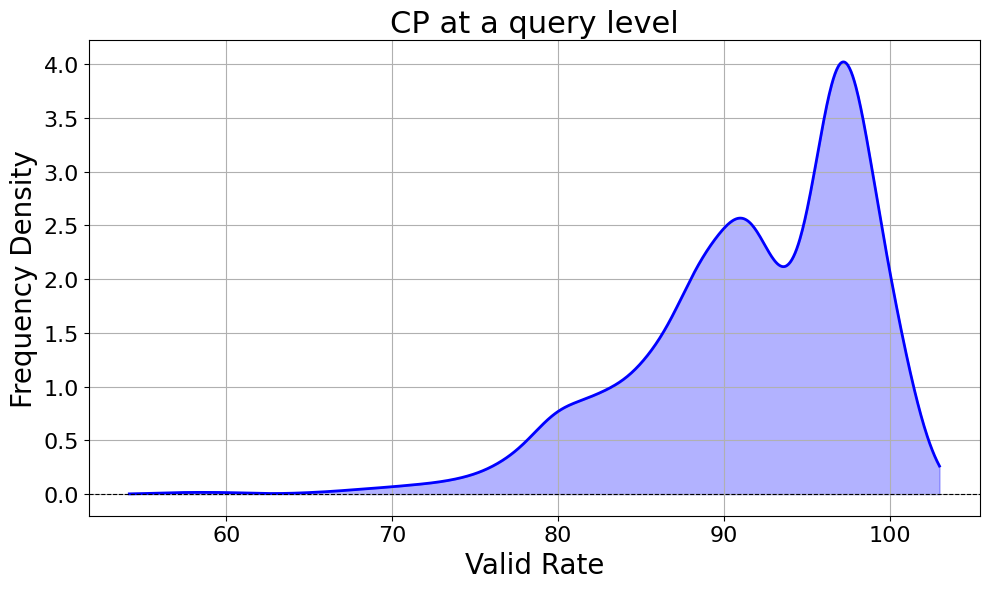

In [ ]:
data1 = generate_data("delta0.9")

plt.figure(figsize=(10, 6))

# List of datasets
datasets = [data1]
colors = ['blue']
#labels = ['No norm']
line_styles = ['-']  # Solid, Dashed, Dotted

bw_adjust=1

# Loop through each dataset and plot its KDE
for data, color, label, style in zip(datasets, colors, labels, line_styles):
    # Calculate the KDE
    kde = gaussian_kde(data, bw_method='scott')
    kde.set_bandwidth(bw_method=kde.factor * bw_adjust)
    # Create a range of values for the x-axis
    x = np.linspace(min(data) - 3, max(data) + 3, 1000)

    # Get the density values
    y_density = kde(x)

    # Number of data points
    n = len(data)

    # Scale the y values to frequency
    y_frequency = y_density * n * (x[1] - x[0])  # (x[1] - x[0]) gives the bin width

    # Plot the filled KDE
    plt.fill_between(x, y_frequency, color=color, alpha=0.3)

    # Plot the outline with different line styles
    plt.plot(x, y_frequency, color=color, linewidth=2, linestyle=style, label=label)

# Add labels and title
plt.xlabel('Valid Rate', fontsize=20)
plt.ylabel('Frequency Density', fontsize=20)
plt.title("CP at a query level", fontsize=22)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#plt.legend(fontsize=20)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0

# Show the plot
plt.tight_layout()
plt.show()

#RTOS X IMDB

##1-Normalization

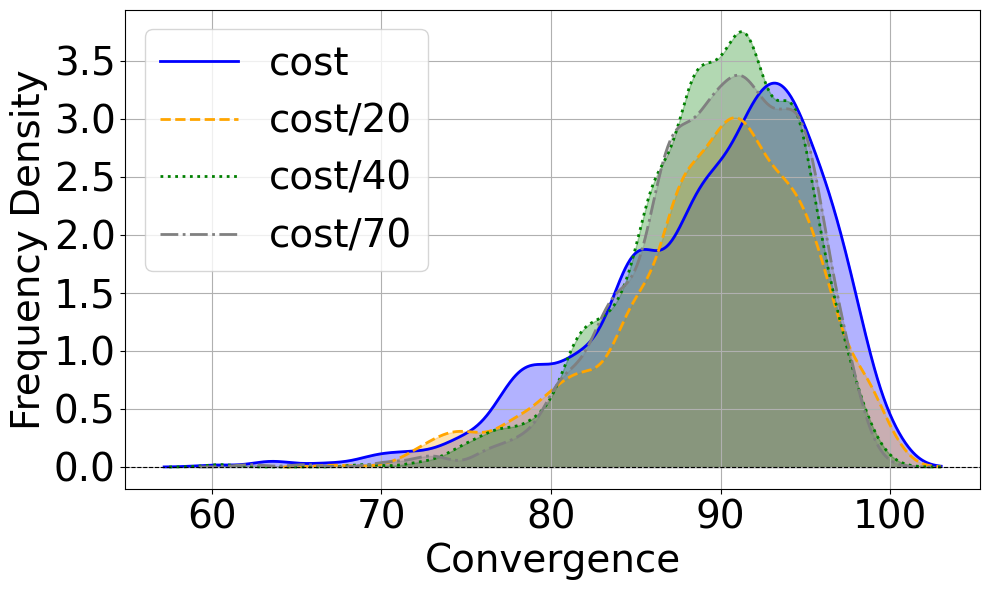

In [64]:
data1Path = "../logs/RTOS/1 - Normalization (Unified CP)/cost"
data2Path = "../logs/RTOS/1 - Normalization (Unified CP)/cost-20"
data3Path = "../logs/RTOS/1 - Normalization (Unified CP)/cost-40"
data4Path = "../logs/RTOS/1 - Normalization (Unified CP)/cost-70"

data1 = generate_data(data1Path)
data2 = generate_data(data2Path)
data3 = generate_data(data3Path)
data4 = generate_data(data4Path)

plt.figure(figsize=(10, 6))

# List of datasets
datasets = [data1, data2, data3, data4]
colors = ['blue', 'orange', "green", "grey"]
labels = ['cost', 'cost/20', "cost/40", "cost/70"]
line_styles = ['-', '--', ":", "-."]

bw_adjust=0.7

# Loop through each dataset and plot its KDE
for data, color, label, style in zip(datasets, colors, labels, line_styles):
    # Calculate the KDE
    kde = gaussian_kde(data, bw_method='scott')
    kde.set_bandwidth(bw_method=kde.factor * bw_adjust)
    # Create a range of values for the x-axis
    x = np.linspace(min(data) - 3, max(data) + 3, 1000)

    # Get the density values
    y_density = kde(x)

    # Number of data points
    n = len(data)

    # Scale the y values to frequency
    y_frequency = y_density * n * (x[1] - x[0])  # (x[1] - x[0]) gives the bin width

    # Plot the filled KDE
    plt.fill_between(x, y_frequency, color=color, alpha=0.3)

    # Plot the outline with different line styles
    plt.plot(x, y_frequency, color=color, linewidth=2, linestyle=style, label=label)

# Add labels and title
plt.xlabel('Convergence', fontsize=28)
plt.ylabel('Frequency Density', fontsize=28)

plt.xticks(fontsize=28)
plt.yticks(fontsize=28)

plt.legend(fontsize=28)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0

# Show the plot
plt.tight_layout()
plt.savefig("./LatencyGaurentees/ImpactOfNormalization/RTOSxJOB.pdf", format="pdf", bbox_inches="tight")
plt.show()

##2 - WholePlan

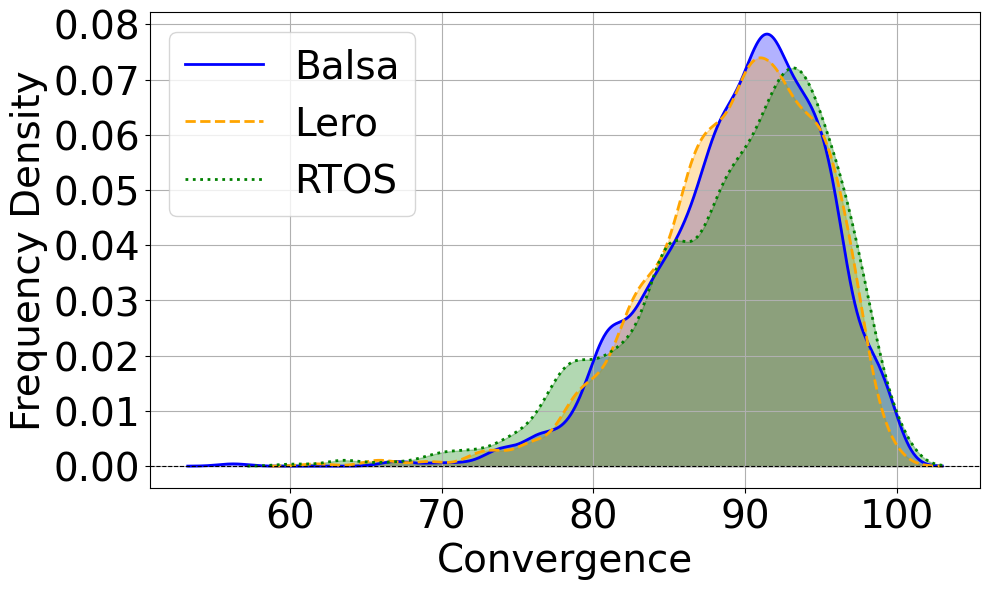

In [71]:
# Ensure necessary imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Assuming generate_data is defined to provide data for each iteration count
balsa = "../logs/Balsa x IMDB/1 - Delta/delta0.9"
lero = "../logs/Lero/IMDB/1 - Delta (Unified CP)/delta0.9"
rtos = "../logs/RTOS/1 - Normalization (Unified CP)/cost"

# Generate the data for each iteration count
data1 = generate_data(balsa)
data2 = generate_data(lero)
data3 = generate_data(rtos)

plt.figure(figsize=(10, 6))

# List of datasets
datasets = [data1, data2, data3]
colors = ['blue', 'orange', 'green']
labels = ['Balsa', 'Lero', 'RTOS']
line_styles = ['-', '--', ':']

bw_adjust = 0.7

# Loop through each dataset and plot its KDE
for data, color, label, style in zip(datasets, colors, labels, line_styles):
    # Calculate the KDE
    kde = gaussian_kde(data, bw_method='scott')
    kde.set_bandwidth(bw_method=kde.factor * bw_adjust)
    # Create a range of values for the x-axis
    x = np.linspace(min(data) - 3, max(data) + 3, 1000)

    # Get the density values (normalized)
    y_density = kde(x)

    # Plot the filled KDE (normalized density)
    plt.fill_between(x, y_density, color=color, alpha=0.3)

    # Plot the outline with different line styles
    plt.plot(x, y_density, color=color, linewidth=2, linestyle=style, label=label)

# Add labels and title
plt.xlabel('Convergence', fontsize=28)
plt.ylabel('Frequency Density', fontsize=28)  # Changed to Density for normalized y-axis

plt.xticks(fontsize=28)
plt.yticks(fontsize=28)

plt.legend(fontsize=28)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0

# Show the plot
plt.tight_layout()
plt.savefig("./UnifiedCP/LQO4JOB.pdf", format="pdf", bbox_inches="tight")
plt.show()


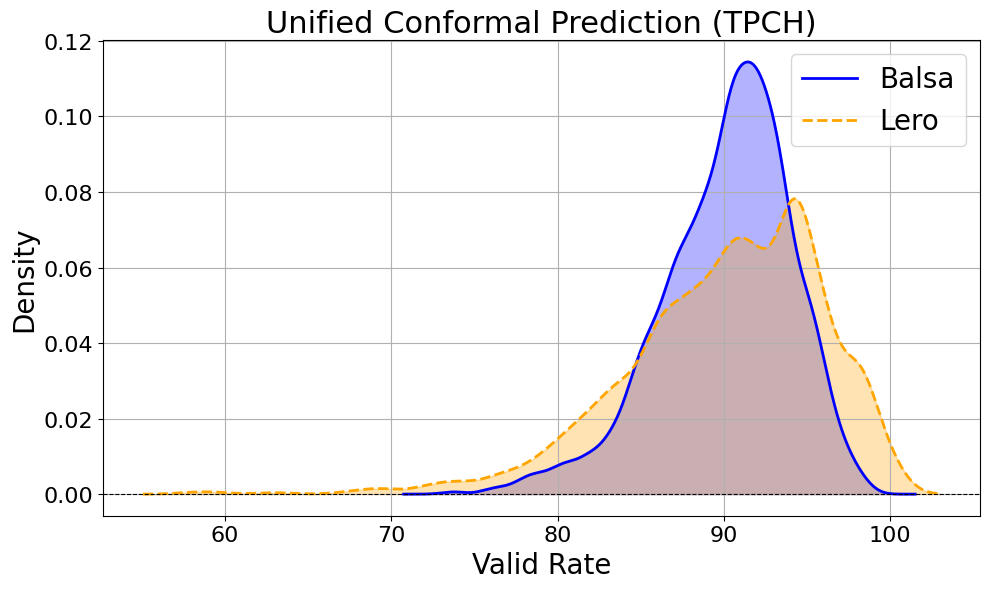

In [ ]:
# Ensure necessary imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Assuming generate_data is defined to provide data for each iteration count
balsa = "../logs/Balsa x TPCH/1 - Delta/delta0.9"
lero = "../logs/Lero/TPCH/1 - Delta (Unified CP)/delta0.9"

# Generate the data for each iteration count
data1 = generate_data(balsa)
data2 = generate_data(lero)

plt.figure(figsize=(10, 6))

# List of datasets
datasets = [data1, data2]
colors = ['blue', 'orange']
labels = ['Balsa', 'Lero']
line_styles = ['-', '--']

bw_adjust = 0.7

# Loop through each dataset and plot its KDE
for data, color, label, style in zip(datasets, colors, labels, line_styles):
    # Calculate the KDE
    kde = gaussian_kde(data, bw_method='scott')
    kde.set_bandwidth(bw_method=kde.factor * bw_adjust)
    # Create a range of values for the x-axis
    x = np.linspace(min(data) - 3, max(data) + 3, 1000)

    # Get the density values (normalized)
    y_density = kde(x)

    # Plot the filled KDE (normalized density)
    plt.fill_between(x, y_density, color=color, alpha=0.3)

    # Plot the outline with different line styles
    plt.plot(x, y_density, color=color, linewidth=2, linestyle=style, label=label)

# Add labels and title
plt.xlabel('Convergence', fontsize=28)
plt.ylabel('Frequency Density', fontsize=28)  # Changed to Density for normalized y-axis

plt.xticks(fontsize=28)
plt.yticks(fontsize=28)

plt.legend(fontsize=28)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0

# Show the plot
plt.tight_layout()
plt.savefig("./UnifiedCP/LQO4TPCH.pdf", format="pdf", bbox_inches="tight")
plt.show()


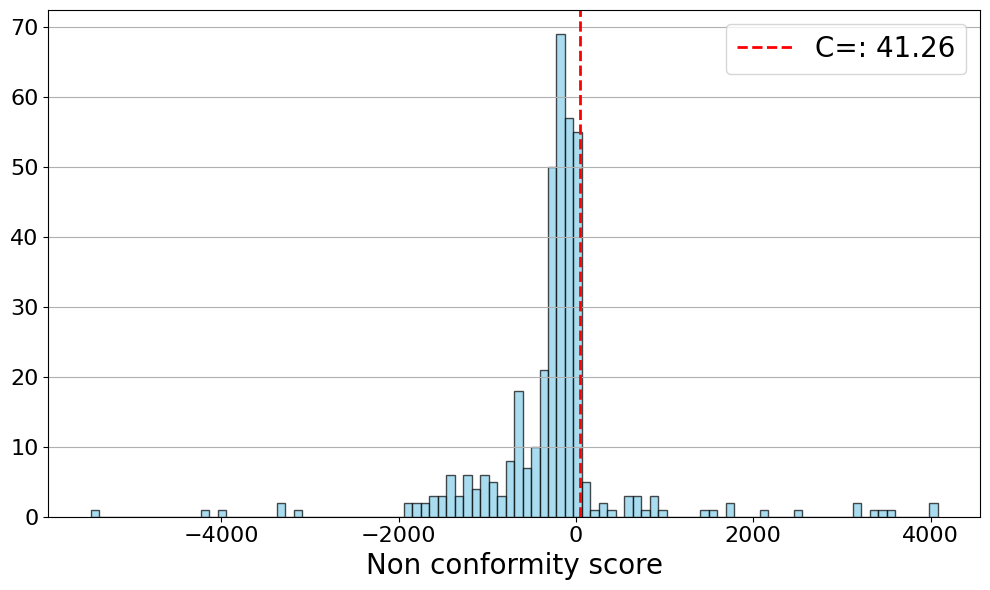

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example sorted data
#data = [-5512.737609375, -4229.12712109375, -3841.03016796875, -3451.15173046875, -3377.88924609375, -3239.020890625, -1672.516892578125, -1645.718767578125, -1632.1899628906249, -1544.9404365234375, -1514.3808662109375, -1436.380107421875, -1434.4869042968749, -1412.105578125, -1404.5672392578126, -1390.0682392578126, -1387.2899375, -1362.20544921875, -1354.6601005859375, -1326.256064453125, -1268.626599609375, -1257.009291015625, -1254.671947265625, -1248.6757998046876, -1245.6085214843752, -1239.73787890625, -1219.5388046875, -1219.0921630859373, -1210.913671875, -1194.680671875, -1175.8192841796874, -1161.6870273437498, -1145.5972890624998, -1127.211474609375, -1094.8924970703124, -1092.14501171875, -1088.9007001953125, -1080.1820703125, -1079.818767578125, -1079.1753046875, -1068.3635400390626, -1067.37187890625, -1066.713755859375, -1064.937998046875, -1064.86864453125, -1059.452529296875, -1041.9818251953125, -1030.5455175781249, -1020.1237392578125, -1019.5522509765624, -986.8716806640625, -981.4858720703126, -974.7150205078124, -969.5090537109372, -965.769669921875, -955.1729375, -947.2279863281251, -942.4877705078125, -934.2797939453126, -930.2656484375, -927.2870878906251, -914.242484375, -899.8575498046876, -862.5183095703126, -855.6825927734376, -853.6204492187499, -848.555693359375, -844.3898085937501, -758.61723046875, -758.1650322265625, -755.7293974609372, -745.5291298828124, -738.8495585937499, -722.679568359375, -705.7851005859375, -676.5894814453125, -674.925384765625, -673.5256699218749, -669.6328251953125, -668.3126601562501, -662.8306699218751, -661.7998637695312, -660.4708247070312, -660.2985585937499, -658.5502656250001, -651.8457109374999, -636.7618759765626, -626.2189589843749, -618.5295917968749, -609.9362265625, -571.3847880859375, -517.5035878906251, -506.85058789062487, -502.36328027343757, -497.69173779296875, -492.25579296875003, -444.9509638671875, -438.7986201171875, -428.75312207031266, -414.1257080078126, -397.8079882812499, -388.742388671875, -385.0331552734374, -381.35222656249994, -381.0943886718751, -368.57462695312506, -366.83622070312504, -361.010626953125, -358.046310546875, -354.7444462890626, -343.110955078125, -340.4070546875, -340.3518515625001, -337.5691943359375, -337.5023105468749, -335.87930468750005, -330.6541943359375, -327.9266279296876, -322.000784423828, -309.5095327148438, -306.94174707031243, -298.7387199707032, -297.64619091796885, -297.5034370117187, -294.7112099609376, -293.46742041015614, -291.33533984375003, -290.6614145507813, -289.26452539062507, -286.9440961914063, -286.7659580078125, -286.5583662109375, -286.44971728515634, -286.3247016601563, -285.5661284179687, -283.5430004882812, -282.2916767578124, -279.6743662109375, -276.41410546875, -274.63515185546885, -273.4161420898438, -272.0069658203124, -269.82287011718745, -267.8404101562501, -266.41433227539073, -266.24047705078124, -263.29152734375, -262.23602978515623, -260.3200634765626, -259.16087597656247, -252.76105468750006, -250.17868847656246, -249.83190576171864, -249.65988867187502, -249.3175773925782, -247.98293749999993, -246.97125781249997, -245.39795800781258, -244.76796386718752, -243.95152319335944, -243.21315332031236, -241.3655556640624, -240.54805444335943, -240.05686523437498, -237.33611328124994, -234.25769873046875, -232.08658007812505, -226.20269409179696, -225.99412109374998, -224.48324511718738, -222.24768945312508, -222.1989060058595, -221.09921777343743, -219.56892578125007, -218.58320214843752, -218.3877744140625, -217.43151098632825, -215.94637890624995, -215.47988305664057, -212.4451506347657, -210.71478710937504, -210.02748437499986, -206.78141113281254, -203.39822753906242, -203.19084301757812, -201.73640795898427, -201.01686328125015, -200.38199804687497, -198.9199243164062, -195.58199829101568, -195.29060131835945, -193.41515576171878, -192.76532666015623, -190.55175122070318, -189.27685009765628, -188.61854394531247, -187.66563256835934, -187.38205517578126, -187.25435620117196, -186.7999775390624, -184.2925068359375, -183.37292333984374, -182.6373818359375, -180.70769531249994, -179.57314794921876, -178.0153723144531, -177.44208642578133, -177.3564331054688, -177.3484260253906, -175.5984340820312, -169.55264086914053, -169.505126953125, -168.4822060546876, -167.59258105468757, -164.11067773437503, -163.92288525390632, -163.5880537109374, -163.25715039062504, -162.7300805664063, -162.04641235351573, -161.06866357421882, -159.6386840820312, -158.32739355468743, -157.1842285156249, -155.49147753906254, -154.14640966796878, -151.04891918945304, -150.62319824218753, -149.64749145507812, -149.3934816894532, -146.86461938476555, -146.57899584960933, -145.6040983886719, -144.83772338867175, -144.58527490234383, -143.4521325683595, -142.55036791992188, -142.41355371093755, -141.2930498046876, -140.84419433593757, -140.65293896484377, -138.8253032226562, -138.79447583007823, -137.9631245117189, -137.49932250976553, -137.15468457031238, -136.6990524902344, -135.9324987792968, -133.99386328125001, -132.68510620117195, -130.4265253906251, -129.61249975585952, -128.12572119140623, -127.39182153320326, -127.15497363281247, -126.58402880859376, -125.56000366210947, -125.26210351562509, -124.98690869140637, -123.63839355468758, -122.93738989257804, -122.71630664062491, -122.15414941406254, -120.38360156249996, -119.22356738281246, -118.92330151367196, -115.2190346679688, -114.91466503906258, -113.78821093750003, -113.55191796874988, -112.94059960937511, -112.86189526367184, -112.22010009765631, -109.75521484375008, -109.70309570312497, -108.04878808593753, -107.91950097656263, -106.91808154296882, -105.0158666992188, -104.21912377929675, -103.11430126953132, -102.47191796874995, -95.47342822265637, -94.19140454101557, -84.3352988281249, -81.26592883300782, -80.67151684570308, -78.01438134765635, -76.63023437499987, -67.15734667968741, -67.13387109375003, -65.12471166992191, -63.54987817382812, -62.02287500000011, -57.95291601562508, -57.62454467773432, -56.56808129882802, -50.387642578124996, -49.897695556640656, -46.49619604492182, -46.04101171875004, -44.8486604003906, -42.93078564453117, -40.22109033203128, -39.95838159179675, -37.06993115234377, -37.00554760742193, -36.773690429687576, -33.232304931640556, -33.21270846557627, -33.13442114257805, -32.6402182617187, -31.50450415039063, -31.399697998046804, -29.714582275390512, -28.162553222656243, -27.13408850097653, -26.837471191406166, -26.044416015625075, -25.694107910156163, -24.0541306152345, -22.704182373046933, -22.063133361816426, -21.827916259765516, -19.53659790039069, -18.677599670410245, -18.59658569335943, -18.571129882812556, -18.487309234619033, -17.578410736083924, -17.471321289062416, -16.52598901367196, -15.911235107421817, -15.256015869140583, -14.589590209960988, -14.501822265624924, -14.401973175048852, -13.819007019043056, -13.742903686523505, -13.625667510986432, -12.913604370117127, -12.044412689208912, -11.393734588623147, -10.59858691406248, -10.396392333984295, -10.39205725097645, -9.185869995117173, -8.949526428222725, -8.573049377441293, -8.479696411132863, 0.0846513671874618, 0.6162075195311445, 6.366296386718659, 15.19384765625, 23.872020996093852, 26.566970581054647, 26.608814697265643, 39.0944958496093, 40.91173339843749, 42.65046020507816, 44.22621191406256, 48.49593750000008, 98.48828125, 102.92590722656246, 135.91690429687492, 183.0759638671875, 194.48411328125007, 278.14994604492176, 318.64050097656263, 400.4571455078126, 402.0602021484376, 495.02438378906254, 588.2193691406251, 603.9248269042969, 651.4642302246093, 652.1455849609374, 654.1904299316407, 702.3167421875, 706.2922470703124, 742.732755859375, 889.1343895263672, 932.5061679687501, 975.1350263671875, 1111.6454697265626, 1336.4731827392577, 1486.9079218749998, 1559.6840318603515, 1714.34848828125, 1739.9426035156248, 1869.9610781249999, 2355.2363779296875, 2483.71866796875, 2534.077015625, 3140.3905488281252, 3364.5639726562504, 3412.6010761718753, 4078.4005917968752]
data = [-5472.18946875, -4161.5092187499995, -3975.144578125, -3365.32941796875, -3344.675046875, -3149.72213671875, -1911.3110859375001, -1905.5350527343749, -1811.8996875, -1782.293341796875, -1699.3413437499999, -1672.516892578125, -1645.718767578125, -1632.1899628906249, -1578.3610283203125, -1551.4999160156249, -1514.3808662109375, -1480.14356640625, -1436.380107421875, -1404.5672392578126, -1390.0682392578124, -1387.2899375, -1375.4784599609375, -1373.9112148437498, -1354.6601005859375, -1331.6256123046874, -1326.256064453125, -1268.626599609375, -1248.6757998046874, -1239.73787890625, -1219.0921630859373, -1210.913671875, -1194.680671875, -1094.8924970703124, -1092.14501171875, -1088.9007001953125, -1079.818767578125, -1066.713755859375, -1041.9818251953125, -1030.5455175781249, -1020.1237392578125, -1019.5522509765625, -986.8716806640625, -981.4858720703126, -969.5090537109372, -955.1729375, -942.4877705078125, -914.242484375, -855.6825927734375, -853.62044921875, -842.1414765625, -758.61723046875, -758.1650322265625, -755.7293974609372, -745.5291298828125, -738.84955859375, -705.7902910156249, -705.7851005859375, -704.7432001953125, -687.5096103515625, -676.5894814453125, -674.925384765625, -673.525669921875, -669.6328251953125, -668.3126601562501, -663.6191376953125, -662.830669921875, -661.7998637695313, -660.4708247070312, -658.5502656250001, -654.977150390625, -651.8457109374999, -636.7618759765626, -626.218958984375, -618.5295917968749, -610.336388671875, -609.9362265625, -600.9711435546874, -594.6357021484375, -552.9273955078125, -527.3429892578125, -517.503587890625, -517.46066015625, -506.850587890625, -502.36328027343757, -497.69173779296875, -492.25579296875003, -465.67137792968754, -463.39950097656254, -451.77541015625, -444.9509638671875, -438.7986201171875, -428.75312207031254, -414.1257080078125, -405.3647373046874, -397.8079882812499, -388.742388671875, -385.0331552734375, -381.35222656249994, -381.094388671875, -368.57462695312495, -361.010626953125, -358.046310546875, -354.7444462890626, -343.110955078125, -340.4070546875, -340.3518515625, -340.26720239257816, -337.5691943359375, -337.50231054687504, -335.87930468750005, -334.05568896484374, -330.6541943359375, -327.92662792968747, -322.0007844238281, -309.5095327148438, -306.94174707031254, -298.7387199707032, -297.5034370117187, -294.7112099609375, -293.46742041015625, -291.33533984375003, -290.6614145507813, -289.26452539062495, -286.9440961914063, -286.7659580078125, -286.5583662109375, -286.3247016601563, -285.5661284179688, -283.5430004882812, -282.2916767578124, -279.6743662109375, -276.41410546875, -274.67409765625007, -274.63515185546873, -272.00696582031253, -269.82287011718745, -267.84041015624996, -267.4254973144532, -266.4143322753906, -263.29152734375, -262.23602978515623, -252.76105468750006, -250.17868847656246, -249.83190576171876, -249.3175773925782, -247.98293750000005, -247.86879809570314, -246.97125781249997, -245.39795800781258, -244.76796386718752, -243.95152319335944, -243.4291323242187, -243.21315332031247, -242.02961254882814, -241.36555566406253, -240.05686523437498, -237.33611328124994, -231.308732421875, -226.20269409179696, -225.99412109374998, -224.4832451171875, -222.19890600585939, -221.86455053710938, -221.09921777343743, -218.3877744140625, -217.43151098632814, -217.3367250976562, -215.47988305664057, -213.9843615722657, -212.4451506347657, -210.02748437499997, -209.60764624023432, -206.78141113281254, -206.16055224609374, -203.39822753906242, -203.19084301757812, -201.7364079589844, -200.38199804687497, -197.1484208984375, -195.68892163085934, -195.58199829101568, -190.55175122070318, -187.66563256835934, -187.38205517578132, -187.25435620117196, -186.79997753906252, -184.91481542968745, -184.2925068359375, -183.37292333984374, -180.70769531249994, -179.57314794921876, -179.33569311523433, -177.4420864257812, -177.3564331054688, -175.5984340820312, -169.55264086914065, -168.38174853515625, -167.59258105468757, -164.70863134765625, -164.11067773437503, -163.92288525390637, -163.58805371093752, -163.25715039062504, -162.7300805664063, -162.04641235351562, -158.32739355468743, -157.1842285156249, -154.14640966796878, -152.0684655761719, -151.04891918945304, -150.62319824218753, -148.39152075195307, -146.86461938476566, -145.6040983886719, -144.83772338867186, -143.4521325683594, -142.55036791992188, -142.41355371093755, -141.2930498046876, -138.7944758300781, -137.96312451171877, -137.49932250976565, -137.1546845703125, -136.36179907226563, -135.9324987792968, -133.99386328125001, -132.68510620117195, -130.426525390625, -129.6124997558594, -127.39182153320314, -127.15497363281247, -125.26210351562497, -124.98690869140626, -122.93738989257815, -122.15414941406254, -119.46610986328125, -119.22356738281246, -118.92330151367196, -118.17908984375003, -115.94319775390625, -115.2190346679688, -113.78821093750003, -113.55191796874999, -112.940599609375, -112.22010009765631, -110.55316455078133, -109.75521484375008, -108.04878808593753, -107.91950097656252, -107.44585009765626, -106.91808154296882, -105.58319897460933, -105.0158666992188, -104.21912377929686, -103.52714404296876, -103.11430126953138, -102.47191796874995, -98.46470214843748, -94.19140454101557, -92.16460180664058, -92.13884814453127, -89.61560473632812, -85.25469848632815, -84.3352988281249, -78.2994506835937, -77.05235131835934, -76.63023437499999, -75.11380346679687, -74.96448535156242, -71.60808593749994, -69.8741994628906, -68.84830810546873, -67.15734667968752, -66.67049389648446, -65.12471166992191, -65.08806933593746, -62.94531787109372, -57.95291601562508, -57.03864404296871, -56.56808129882813, -50.387642578124996, -43.3192272949218, -41.40073071289066, -37.06993115234377, -37.00554760742193, -33.232304931640556, -33.212708465576156, -33.13442114257816, -32.6402182617187, -29.714582275390626, -27.13408850097653, -26.83747119140628, -26.044416015625075, -22.063133361816426, -21.879846923828154, -21.82791625976563, -18.67759967041013, -18.59658569335943, -18.571129882812556, -18.487309234619147, -17.578410736083924, -17.471321289062416, -16.9065070800782, -16.525989013671847, -15.911235107421817, -15.256015869140583, -14.589590209960988, -14.501822265625037, -14.401973175048852, -13.819007019042942, -13.625667510986318, -12.913604370117127, -12.044412689209025, -11.393734588623033, -10.59858691406248, -10.396392333984295, -10.392057250976563, -9.185869995117173, -8.949526428222612, -8.573049377441407, -7.0008879394531505, -6.908277709960885, -0.9363505859374754, 0.6162075195312582, 2.2491940917968805, 6.366296386718773, 7.49925329589837, 8.116427978515617, 8.3622028808594, 9.801364990234333, 10.314416503906273, 10.660825561523438, 10.759813476562499, 15.19384765625, 21.78664282226555, 27.565246337890585, 30.955510986328136, 39.0944958496093, 39.6411875, 40.91173339843749, 42.65046020507816, 44.22621191406256, 51.06938281249995, 54.238749511718765, 56.415158935546856, 102.92590722656246, 118.59326147460939, 126.36615283203128, 135.91690429687492, 136.63305957031253, 183.07596386718762, 304.2562048339844, 318.6405009765625, 400.4571455078126, 550.9327416992187, 588.2193691406251, 603.9248269042969, 651.4642302246093, 652.1455849609374, 706.2922470703124, 742.732755859375, 832.3898981933594, 868.9324443359376, 908.6646467285157, 975.1350263671875, 1486.9079218749998, 1570.0934943847656, 1705.4973564453126, 1714.34848828125, 2166.256808593749, 2531.9032617187495, 3140.3905488281252, 3189.357421875, 3364.5639726562504, 3412.6010761718753, 3518.892960937501, 4053.539312499999, 4078.4005917968752]

# Calculate the 90th percentile value
percentile_90 = np.percentile(data, 90)

# Plot the histogram of the data
plt.figure(figsize=(10, 6))
plt.hist(data, bins=100, color='skyblue', edgecolor='black', alpha=0.7, density=False)

# Add a vertical line for the 90th percentile
plt.axvline(x=percentile_90, color='red', linestyle='--', linewidth=2, label=f'C=: {percentile_90:.2f}')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Add labels and title
plt.xlabel('Non conformity score', fontsize=20)
#plt.ylabel('Density', fontsize=20)
plt.legend(fontsize=20)


plt.grid(True, axis='y')

# Show the plot
plt.tight_layout()
plt.show()


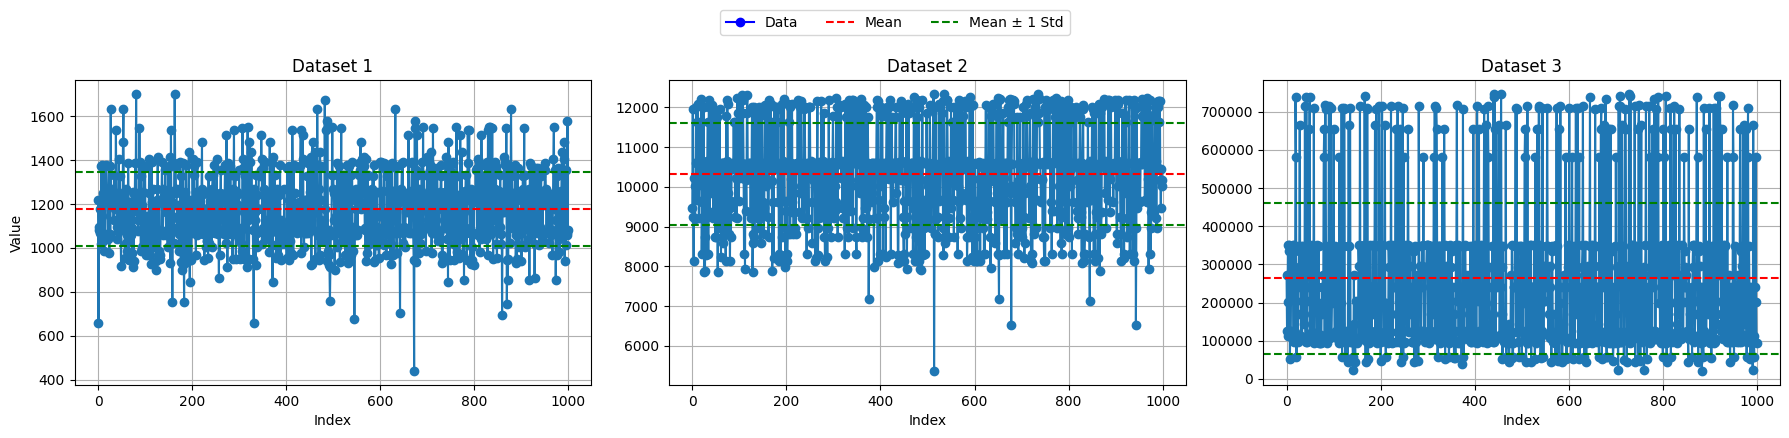

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Example data for 3x1 grid
x = np.arange(1000)
y1 = generate_data_quant("Balsa")
y2 = generate_data_quant("Lero")
y3 = generate_data_quant("RTOS")

# Calculate mean and std for each dataset
mean1, std1 = np.mean(y1), np.std(y1)
mean2, std2 = np.mean(y2), np.std(y2)
mean3, std3 = np.mean(y3), np.std(y3)

# Increase width and maintain compact height
fig, axs = plt.subplots(1, 3, figsize=(18, 4))  # Wider subplots

# Define line and marker style
line_style = '-o'

# Plot on the first subplot
axs[0].plot(x, y1, line_style, label='Data')
axs[0].axhline(mean1, color='r', linestyle='--')
axs[0].axhline(mean1 + std1, color='g', linestyle='--')
axs[0].axhline(mean1 - std1, color='g', linestyle='--')
axs[0].set_title('Dataset 1')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Value')
axs[0].grid(True)

# Plot on the second subplot
axs[1].plot(x, y2, line_style)
axs[1].axhline(mean2, color='r', linestyle='--')
axs[1].axhline(mean2 + std2, color='g', linestyle='--')
axs[1].axhline(mean2 - std2, color='g', linestyle='--')
axs[1].set_title('Dataset 2')
axs[1].set_xlabel('Index')
axs[1].grid(True)

# Plot on the third subplot
axs[2].plot(x, y3, line_style)
axs[2].axhline(mean3, color='r', linestyle='--')
axs[2].axhline(mean3 + std3, color='g', linestyle='--')
axs[2].axhline(mean3 - std3, color='g', linestyle='--')
axs[2].set_title('Dataset 3')
axs[2].set_xlabel('Index')
axs[2].grid(True)

# Create a shared legend for all subplots
lines = [plt.Line2D([0], [0], color='b', marker='o', linestyle='-', label='Data'),
         plt.Line2D([0], [0], color='r', linestyle='--', label=f'Mean'),
         plt.Line2D([0], [0], color='g', linestyle='--', label=f'Mean ± 1 Std')]

fig.legend(handles=lines, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3)

# Adjust layout for better fit and spacing
plt.tight_layout()
plt.show()


In [13]:
def quantile_stats(quantList, dataset):
  # Example list of numbers
  numbers = quantList

  # Convert the list to a NumPy array
  data = np.array(numbers)

  # Calculate mean and standard deviation
  mean = np.mean(data)
  std_dev = np.std(data)

  # Plot the data
  plt.figure(figsize=(10, 6))

  # Plot the numbers
  plt.plot(data, marker='o', label='Data')

  # Plot the mean line
  plt.axhline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')

  # Plot lines for 1 standard deviation from the mean
  plt.axhline(mean + std_dev, color='green', linestyle='--', label=f'Mean + 1 Std: {mean + std_dev:.2f}')
  plt.axhline(mean - std_dev, color='green', linestyle='--', label=f'Mean - 1 Std: {mean - std_dev:.2f}')

  # Labels and title
  plt.title(f'Deviation Plot for {dataset}')
  plt.xlabel('Index')
  plt.ylabel('Value')
  plt.legend()

  # Show the plot
  plt.grid(True)
  plt.show()


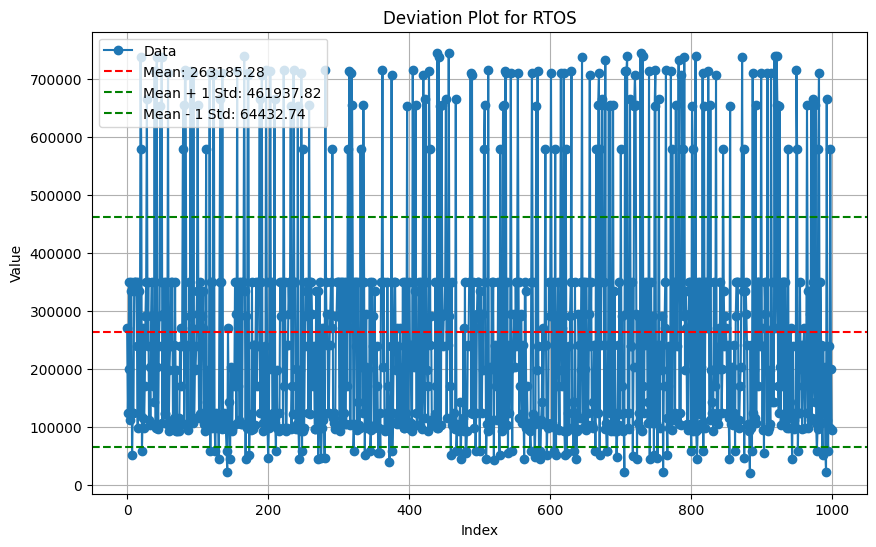

In [16]:
quantile_stats(generate_data_quant("RTOS"), "RTOS")